##IMPORT LIBRARIES

In [ ]:
# data manipulation
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns


# use sklearn to import a dataset
from sklearn.datasets import load_wine

##LOADING DATA

In [ ]:
data = pd.read_csv('/content/imdb_top_1000.csv')
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


###Q1: What is the size of the dataset? How many movies are included?

In [ ]:
size = data.shape
print("No of Movies in the dataset = ",size[0])

No of Movies in the dataset =  1000


###Q2: What are the features (columns) present in the dataset? What does each feature represent?

In [ ]:
column_names = data.columns.tolist()
print("Column names:", column_names)

Column names: ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


###Q3: Are there any missing values in the dataset? If so, how should they be handled?

In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [ ]:
data['Certificate'].fillna("None", inplace=True)
data['Meta_score'].fillna(0, inplace=True)
data['Gross'].fillna(0, inplace=True)

missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


certificate has 101 null values, Meta_Score has 157 and Gross has 169 so we will fill these null values with NaN instead of dropping them because they are quiet large according to the size of dataset.

###Q4: What is the distribution of movie ratings? Are they skewed towards positive or negative ratings?

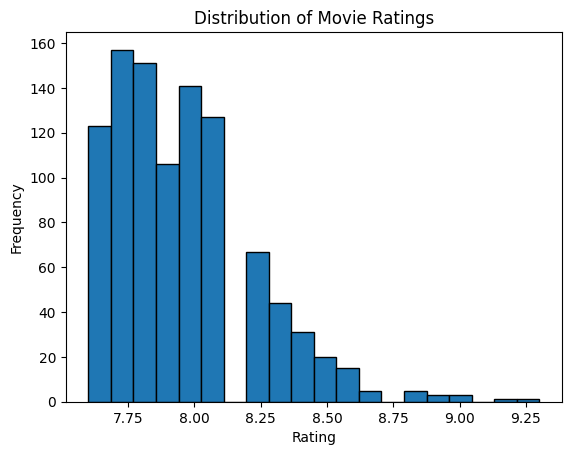

Skewness: 1.016964453611272 Positive skewness indicate the data is skewed towards right


In [ ]:
plt.hist(data['IMDB_Rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()


skewness = data['IMDB_Rating'].skew()
print(f'Skewness: {skewness} Positive skewness indicate the data is skewed towards right')

###Q5: Is there a relationship between movie ratings and the number of votes or reviews?

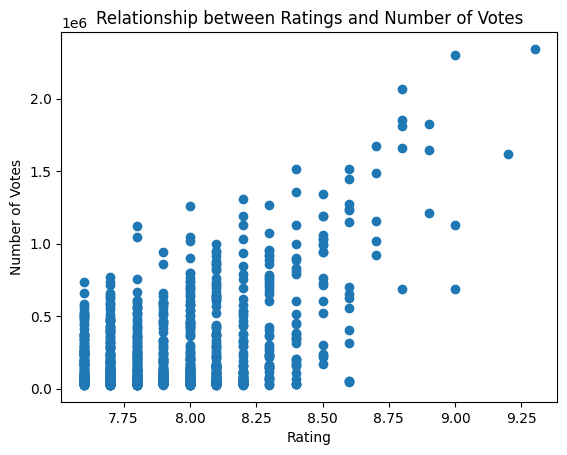

In [ ]:
plt.scatter(data['IMDB_Rating'], data['No_of_Votes'])
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.title('Relationship between Ratings and Number of Votes')
plt.show()


###Q6: Are there any outliers in the movie ratings or other numerical features? If so, how should they be treated?

Using Boxplot on each of the numeric column we see outliers in the all three numeric columns.

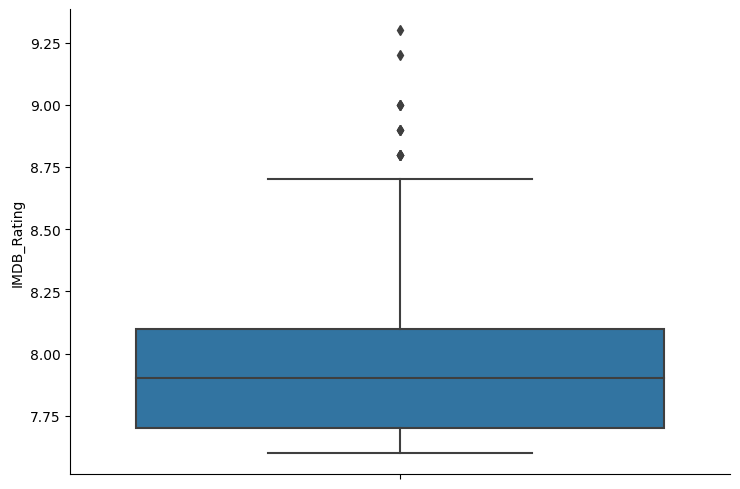

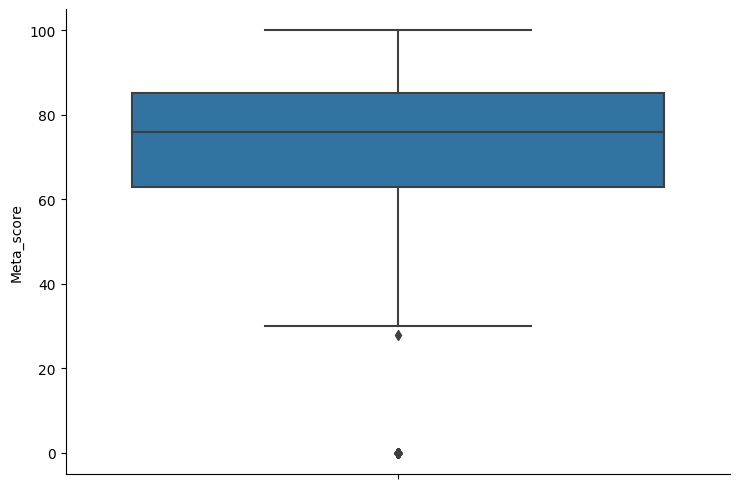

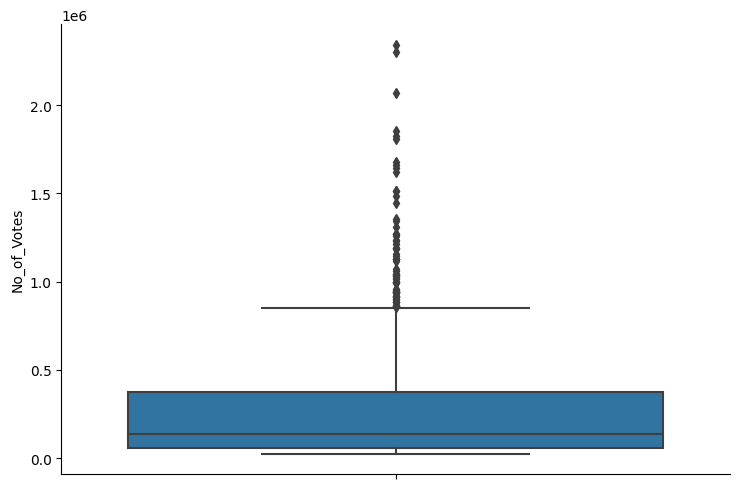

In [ ]:
import seaborn as sns

column = ['IMDB_Rating','Meta_score','No_of_Votes']

for i in range(0,3,1):
  sns.catplot(data, y=column[i], kind="box",aspect = 1.5)
  plt.show()

###Q7: What are the most common genres among the movies in the dataset?

In [ ]:
# Assuming your dataset has a 'Genres' column containing genre information
common_genres = data['Genre'].str.split(', ').explode().value_counts()
print(common_genres)

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: Genre, dtype: int64


###Q8:How does the distribution of movie genres affect the ratings?

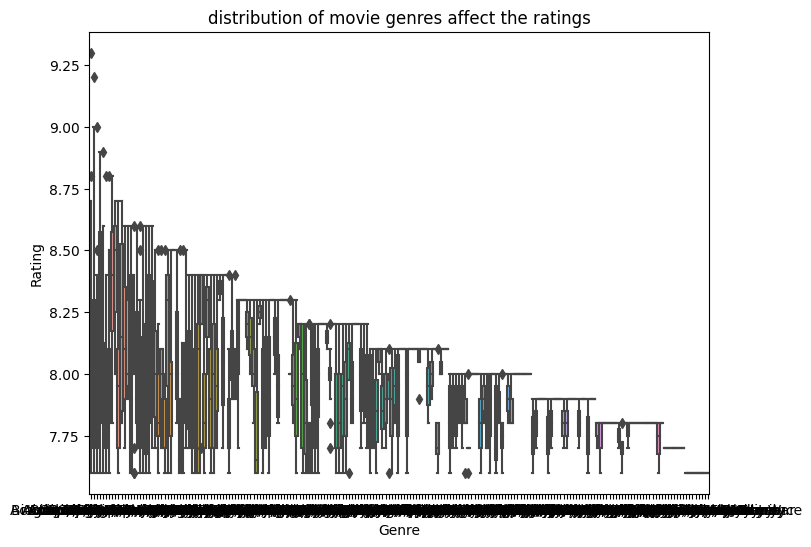

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Genre', y='IMDB_Rating')
plt.title("distribution of movie genres affect the ratings")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

###Q9: Is there a correlation between the movie's budget and its rating?

In [ ]:
# Remove commas and convert 'Gross' to numeric
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)

correlation = data['Gross'].corr(data['IMDB_Rating'])
print(f'Correlation between Budget and Rating: {correlation}')

Correlation between Budget and Rating: 0.09592277110132356


###Q10: What are the top-rated movies in the dataset? What are their common characteristics?

In [ ]:
top_rated_movies = data.sort_values(by='IMDB_Rating', ascending=False).head(10)
top_rated_movies


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0
11,https://m.media-amazon.com/images/M/MV5BNWIwOD...,Forrest Gump,1994,UA,142 min,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182.0


###Q11: Are there any temporal trends in movie ratings over the years?

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=data)
plt.title('Temporal Trends in Movie Ratings')
plt.show()


###Q12: How do the movie ratings vary across different countries or regions?

No country information given.

###Q13: Are there any specific directors or actors associated with higher-rated movies?

In [ ]:
director_ratings = data.groupby('Director')['IMDB_Rating'].mean()

print("Director Ratings:")
print(director_ratings.nlargest(10))


Director Ratings:
Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
Fernando Meirelles    8.60
George Lucas          8.60
Masaki Kobayashi      8.60
Roberto Benigni       8.60
Sudha Kongara         8.60
Thomas Kail           8.60
Milos Forman          8.50
Name: IMDB_Rating, dtype: float64


###Q14: Can we identify any patterns based on movie duration and ratings?

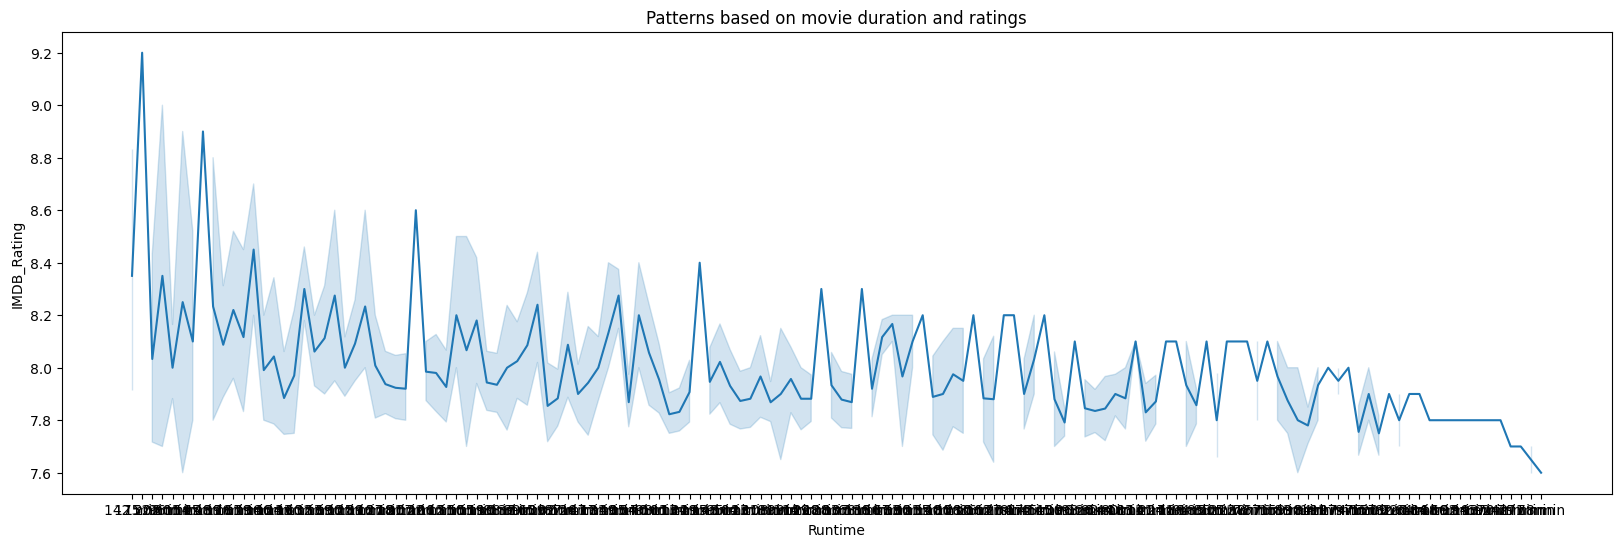

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Runtime', y='IMDB_Rating', data=data)
plt.title('Patterns based on movie duration and ratings')
plt.show()


###Q15: How do the movie ratings differ across various film certification categories (e.g., G,PG, PG-13, R)?

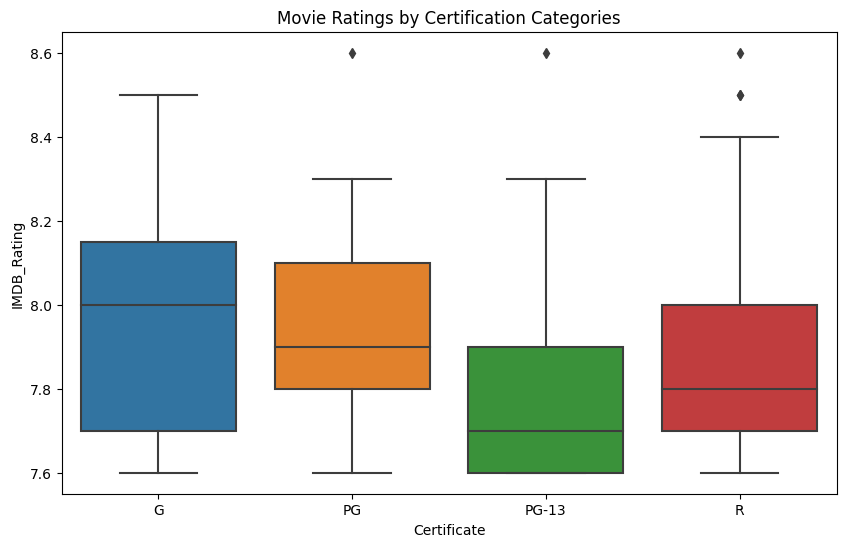

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=data, order=['G', 'PG', 'PG-13', 'R'])
plt.title('Movie Ratings by Certification Categories')
plt.show()


###Q16: Are there any interesting insights when comparing the ratings of different movie types, such as animated vs. live-action or sci-fi vs. drama?

In [ ]:
Comedy_mean_rating = data[data['Genre'] == 'Comedy']['IMDB_Rating'].mean()
Drama_mean_rating = data[data['Genre'] == 'Drama']['IMDB_Rating'].mean()

print(f'Mean Rating for Comedy Movies: {Comedy_mean_rating}')
print(f'Mean Rating for Drama Movies: {Drama_mean_rating}')


Mean Rating for Comedy Movies: 7.823076923076924
Mean Rating for Drama Movies: 7.975294117647061


###Q17: Is there a relationship between the movie runtime and its rating?

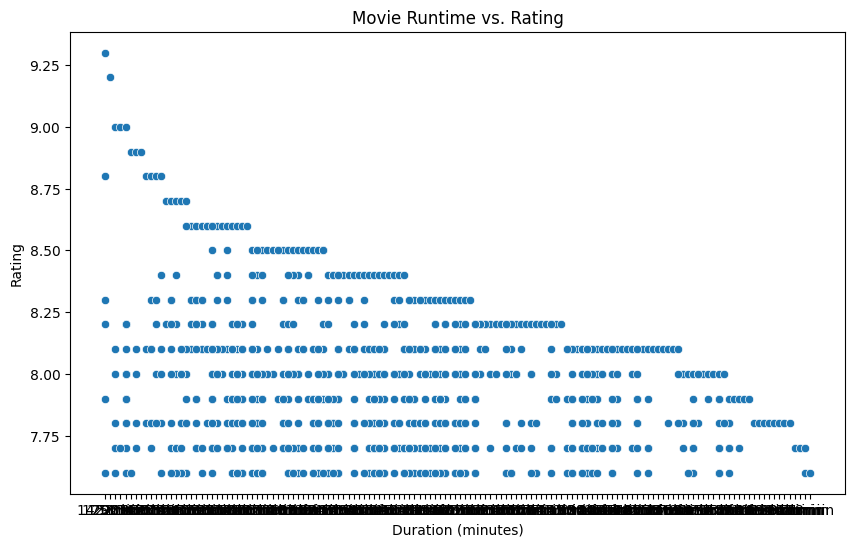

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=data)
plt.title('Movie Runtime vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


###Q18: Are certain production studios associated with higher-rated movies?


No.

###Q19: How do movie budgets vary with respect to genres and ratings?

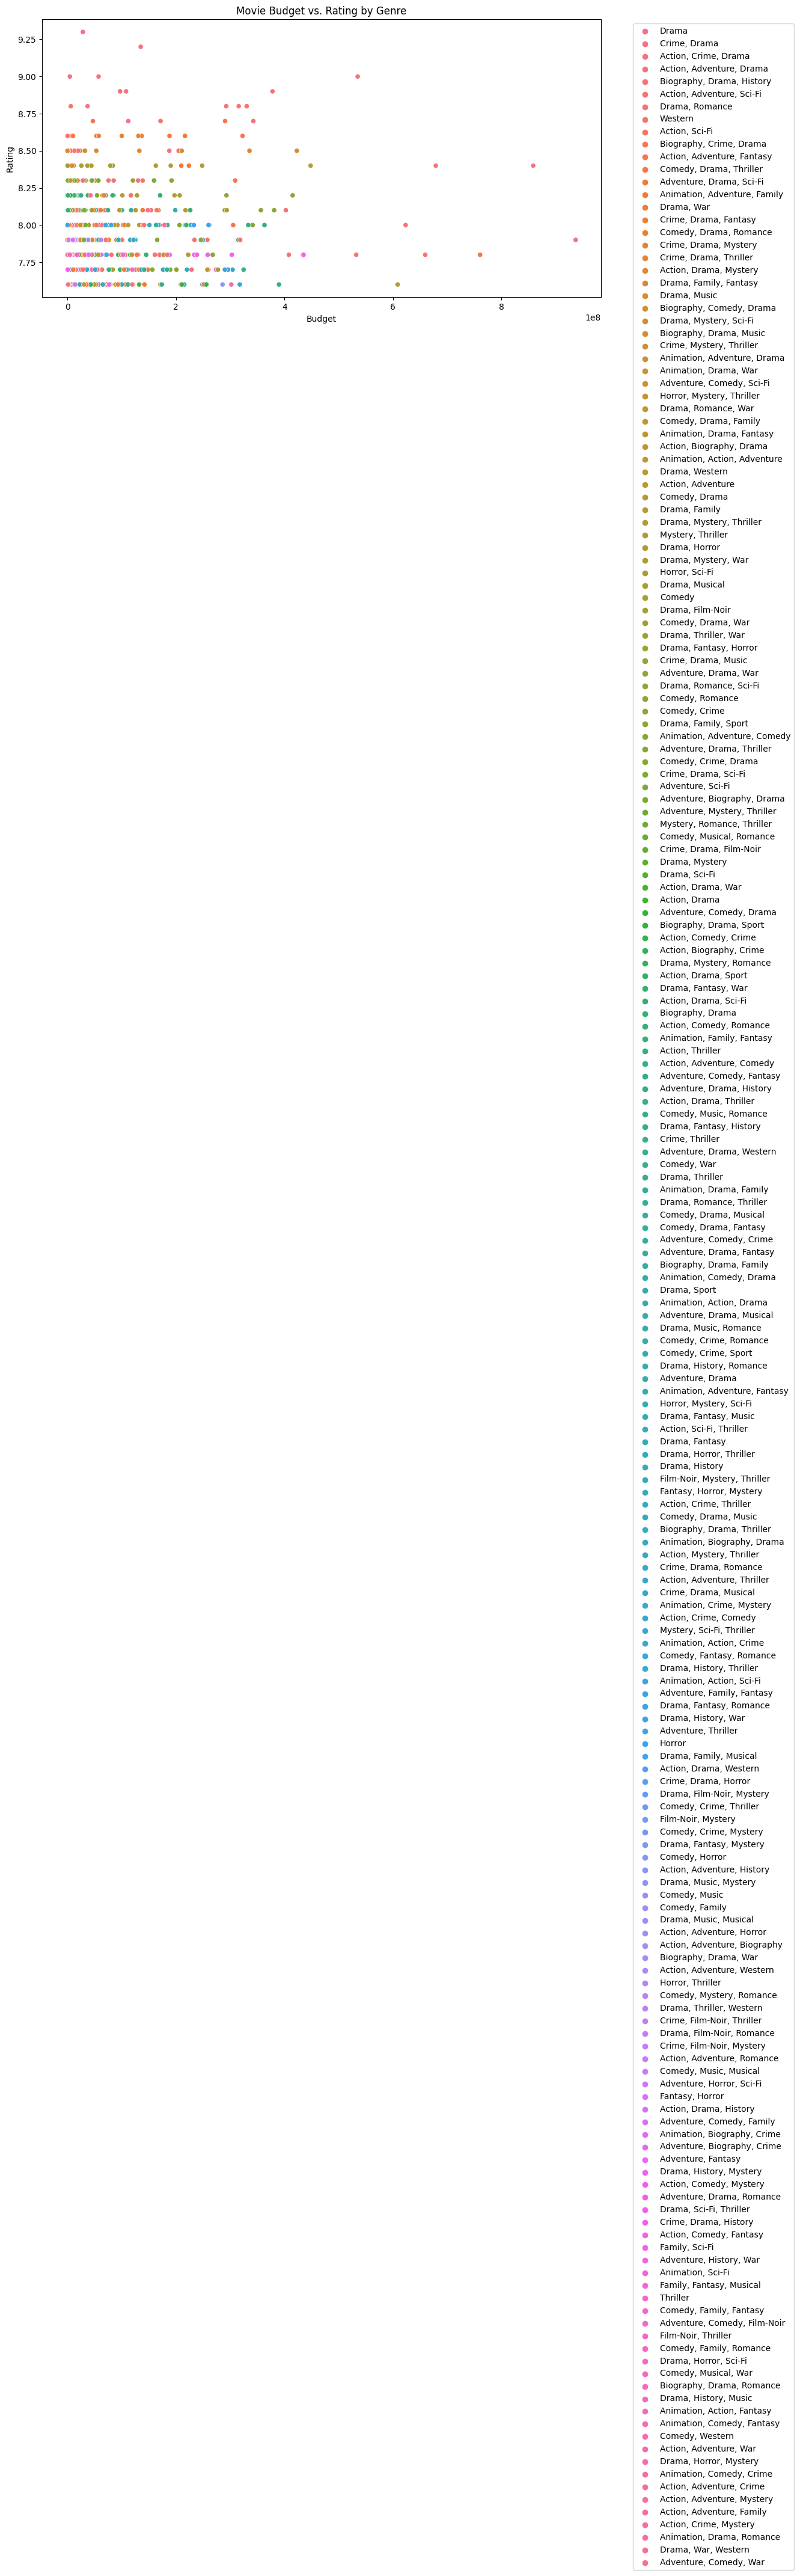

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Gross', y='IMDB_Rating', hue='Genre', data=data)
plt.title('Movie Budget vs. Rating by Genre')
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Q20: Can we identify any seasonal trends or patterns in movie ratings?

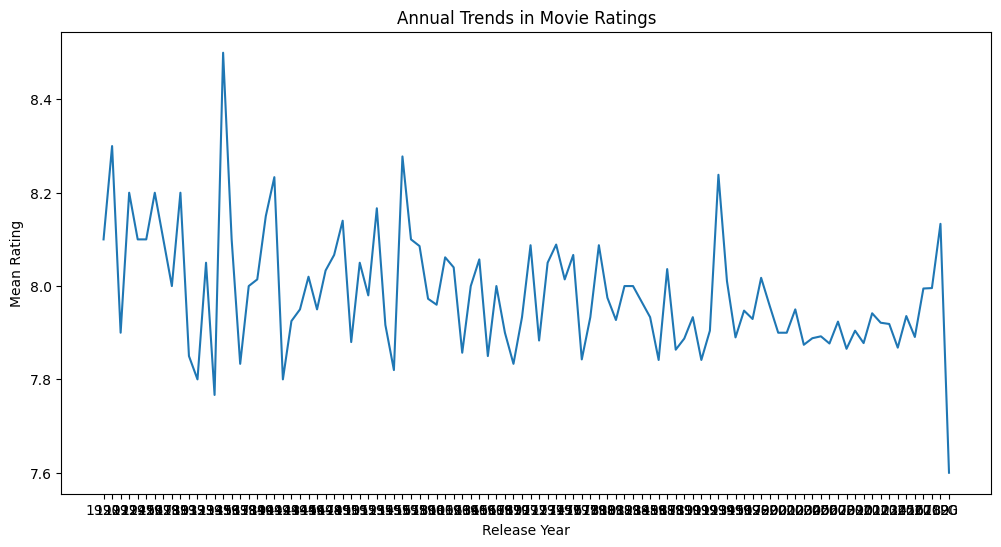

In [100]:
ratings_by_year = data.groupby('Released_Year')['IMDB_Rating'].mean()

# Plot the ratings trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Mean Rating')
plt.title('Annual Trends in Movie Ratings')
plt.show()